In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
california=fetch_california_housing()
df=pd.DataFrame(california.data, columns=california.feature_names)
df['Price']=california.target
print("Dataset(first 5 rows):\n",df.head())

Dataset(first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [19]:
df.shape


(20640, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
df.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
Price         False
dtype: bool

In [22]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
Price          3842
dtype: int64

In [23]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

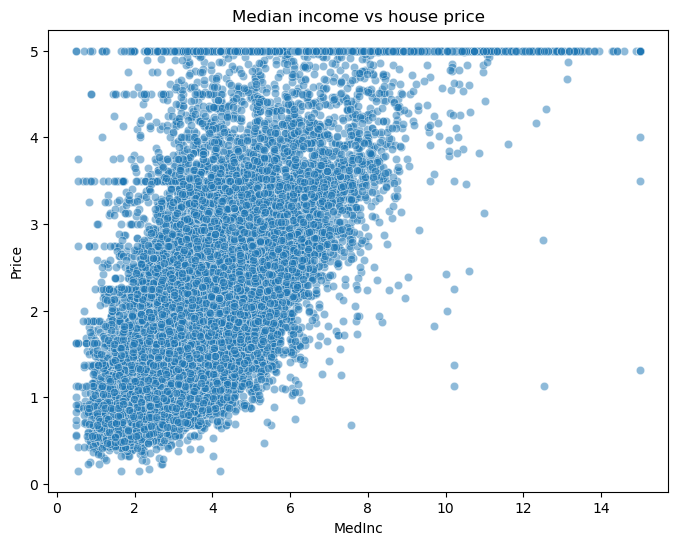

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median income vs house price')
plt.show()

In [27]:
print("\nCorrelation with Price:\n",df.corr()['Price'].sort_values())


Correlation with Price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


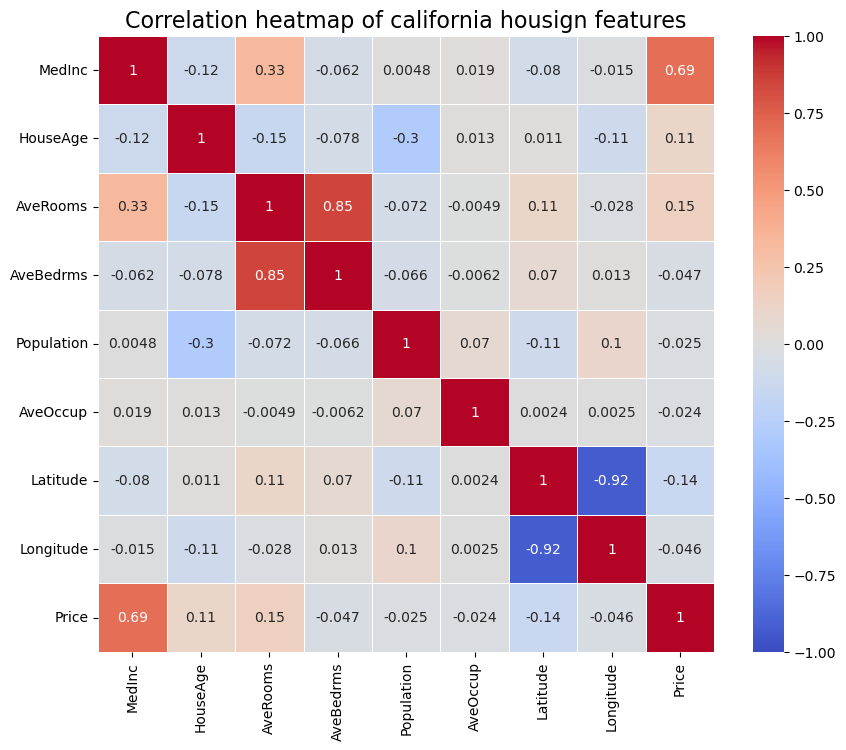

In [28]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1,
           center=0,
           square=True,
           linewidth=0.5)
plt.title('Correlation heatmap of california housign features', fontsize=16)
plt.show()

In [32]:
X=df[['MedInc']]
y=df['Price']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"\nLinear Equation:Price ={model.coef_[0]:.2f}*MedInc+{model.intercept_:.2f}\n")


Linear Equation:Price =0.42*MedInc+0.44



In [43]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nmae:{mae:.2f}$100K")
print(f"rmse:{rmse:.2f}$100K")
print(f"r2:{r2:.2f}\n")


mae:0.63$100K
rmse:0.84$100K
r2:0.46



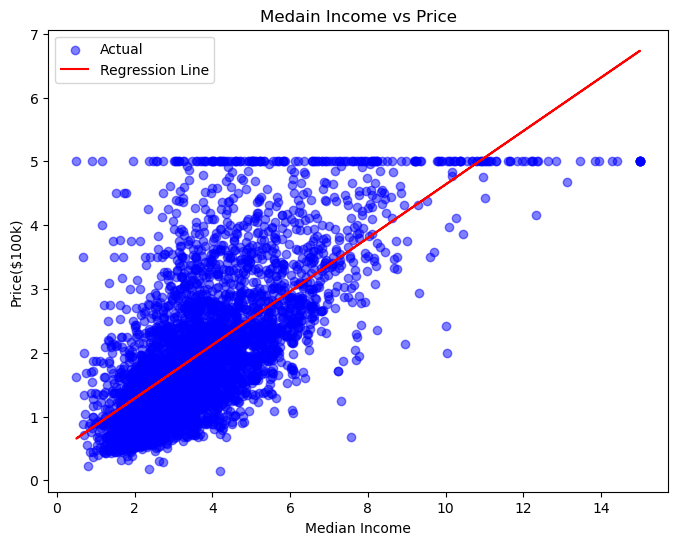

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test,color='blue',label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.title('Medain Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('Price($100k)')
plt.legend()
plt.show()